# <p style="text-align: center;">Logistic Regression</p>

In [3]:
#!pip install cartopy
#!pip install imageio 

## Import libraries

In [8]:
import pandas as pd
import numpy as np

import glob
import os

import requests

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import zipfile

#import xarray as xr

import folium
from folium.plugins import MarkerCluster

import pandas as pd
#from geopy.geocoders import Nominatim

import geopandas as gpd
#import cartopy.crs as ccrs

#import imageio

from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree

## Set parameters

In [9]:
decree_filename_base = 'arrete_'
decrees_folder_name = './../../data/raw/decrees'
communes_folder_name = './../../data/raw/opendatasoft'
weather_folder_name = './../../data/raw/weather/era5'
weather_ncfiles_folder_name = './../../data/raw/weather/era5/ncfiles'
processed_data_folder_name = './../../data/processed'
maps_folder_name = './../../data/processed/maps'
decrees_filename = 'decrees.parquet'
decrees_locations_filename = 'decrees_locations.parquet'
communes_csv_filename = 'correspondance-code-insee-code-postal.csv'
weather_filename = 'weather.parquet'
weather_shema = 'weather_shema.csv'
weather_decrees_filename = 'weather_decrees.parquet'
weather_decrees_shema = 'weather_decrees.csv'
#weather_zip_file = "193fcd51a8958175843ecbbcaba057c8.zip"

## Load Weather data

| Column    | Description                                      |
|-----------|--------------------------------------------------|
| date      | The date of the observation.                     |
| latitude  | The latitude coordinate of the observation point.|
| longitude | The longitude coordinate of the observation point.|
| number    | A unique identifier for the observation.         |
| expver    | Experiment version number.                       |
| u10       | 10-meter U-component of wind (eastward wind).    |
| v10       | 10-meter V-component of wind (northward wind).   |
| t2m       | 2-meter temperature (air temperature at 2 meters above the surface).|
| sp        | Surface pressure.                                |
| tp        | Total precipitation.                             |
| e         | Evaporation.                                     |
| sro       | Surface runoff.                                  |
| tcrw      | Total column water vapor.                        |
| stl1      | Soil temperature level 1.                        |
| stl2      | Soil temperature level 2.                        |
| slt       | Soil type.                                       |
| swvl1     | Volumetric soil water layer 1.                   |
| swvl2     | Volumetric soil water layer 2.                   |
| cvh       | High vegetation cover.                           |
| cvl       | Low vegetation cover.                            |
| tvh       | High vegetation type.                            |
| tvl       | Low vegetation type.                             |


## Import Data

In [11]:
# read the dataframe from parquet
import pandas as pd

df = pd.read_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))




In [12]:
os.path.join(processed_data_folder_name, weather_decrees_shema)

'./../../data/processed/weather_decrees.csv'

In [13]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_decrees_shema), index_col=0).squeeze("columns")

In [14]:
# Apply the schema to the loaded dataframe
df = df.astype(schema.to_dict())

In [15]:
df.head()

,date_1,latitude_1,longitude_1,u10_1,v10_1,t2m_1,sp_1,tp_1,e_1,sro_1,...,Code Arrondissement_2,Code Département_2,Code Région_2,start_event_year_2,latitude_2,longitude_2,year_2,latitude_rad_2,longitude_rad_2,distance_km
201,1990-01-01,51.25,2.50,4.651482,6.094338,7.558984,101673.1875,0.002449,-0.001736,3.814697e-06,...,4.0,59,31.0,1989,51.073044,2.527649,1990,0.891393,0.044116,19.770879
254,1990-01-01,51.00,1.50,5.272575,6.298440,8.234766,101567.1875,0.003467,-0.001933,9.536743e-07,...,3.0,62,31.0,1990,50.888336,1.682486,1990,0.888169,0.029365,17.822208
255,1990-01-01,51.00,1.75,4.917595,6.070413,7.896875,101591.1875,0.003078,-0.001807,1.049042e-05,...,6.0,62,31.0,1989,50.950207,1.875756,1990,0.889249,0.032738,10.400898
256,1990-01-01,51.00,2.00,3.881462,4.989358,7.142969,101607.1875,0.002492,-0.001066,3.910065e-05,...,5.0,62,31.0,1990,50.981233,2.039307,1990,0.889790,0.035593,3.453043
257,1990-01-01,51.00,2.25,3.224724,4.463479,6.730859,101649.1875,0.002129,-0.000822,4.005432e-05,...,4.0,59,31.0,1989,51.001214,2.223048,1990,0.890139,0.038800,1.890829


In [16]:
df.columns

Index(['date_1', 'latitude_1', 'longitude_1', 'u10_1', 'v10_1', 't2m_1',
       'sp_1', 'tp_1', 'e_1', 'sro_1', 'tcrw_1', 'stl1_1', 'stl2_1', 'slt_1',
       'swvl1_1', 'swvl2_1', 'cvh_1', 'cvl_1', 'tvh_1', 'tvl_1', 'month_1',
       'year_1', 'u10_ref_1', 'u10_delta_1', 'v10_ref_1', 'v10_delta_1',
       't2m_ref_1', 't2m_delta_1', 'sp_ref_1', 'sp_delta_1', 'tp_ref_1',
       'tp_delta_1', 'e_ref_1', 'e_delta_1', 'sro_ref_1', 'sro_delta_1',
       'tcrw_ref_1', 'tcrw_delta_1', 'stl1_ref_1', 'stl1_delta_1',
       'stl2_ref_1', 'stl2_delta_1', 'swvl1_ref_1', 'swvl1_delta_1',
       'swvl2_ref_1', 'swvl2_delta_1', 'cvh_ref_1', 'cvh_delta_1', 'cvl_ref_1',
       'cvl_delta_1', 'latitude_rad_1', 'longitude_rad_1', 'insee_2',
       'nom_commune_2', 'debut_evenement_2', 'fin_evenement_2',
       'date_arrete_2', 'date_parution_jo_2', 'nom_peril_2', 'code_peril_2',
       'franchise_2', 'code_nor_2', 'decision_2', 'Code INSEE_2',
       'Code Postal_2', 'Commune_2', 'Département_2', 'Région

In [67]:
X = df[[ 'latitude_1', 'longitude_1', 't2m_delta_1', 'tp_delta_1','swvl1_delta_1','swvl2_delta_1']]
X.head()

,latitude_1,longitude_1,t2m_delta_1,tp_delta_1,swvl1_delta_1,swvl2_delta_1
201,51.25,2.50,1.695812,-0.000074,-0.001406,-0.001640
254,51.00,1.50,1.811233,0.000400,-0.000115,-0.000182
255,51.00,1.75,1.777286,0.000349,-0.002783,-0.003501
256,51.00,2.00,1.737944,0.000361,-0.010817,-0.013442
257,51.00,2.25,1.721110,0.000216,-0.012106,-0.014683


In [21]:
df['code_peril_2'].value_counts()

code_peril_2
ICB    179408
SEC    160824
MVT     19968
CMV      7060
SEI      5900
IRN      3812
GLT      2352
VCY      1264
AVA      1080
ECB       540
EFA       480
PDN        84
LVT        72
DIV        48
COB        36
GRL        36
RAZ        24
GET        12
Name: count, dtype: int64

In [22]:
df['drought_flag'] = df['code_peril_2'].apply(lambda x: 1 if x == 'SEC' else 0)

In [23]:
df['drought_flag'] .head()

201    1
254    0
255    1
256    1
257    1
Name: drought_flag, dtype: int64

In [33]:
df['drought_yearly_flag'] = df.groupby(['year_2','Code Commune_2'])['drought_flag'].transform('max')

In [34]:
df['drought_yearly_flag'].head()

201    1
254    0
255    1
256    1
257    1
Name: drought_yearly_flag, dtype: int64

In [35]:
y = df['drought_yearly_flag']

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

'''
# Sample dataframe
data = {
    'latitude': [34.05, 36.16, 40.71, 34.05, 36.16, 40.71],
    'longitude': [-118.24, -115.15, -74.00, -118.24, -115.15, -74.00],
    'temperature': [20, 25, 30, 22, 26, 28],
    'precipitation': [100, 50, 30, 110, 60, 40],
    'date': pd.date_range(start='1/1/2020', periods=6, freq='M'),
    'drought_flag': [0, 1, 0, 0, 1, 0]
}
'''
#df = pd.DataFrame(data)

# Feature selection
#X = df[['latitude_1', 'longitude_1', 'tp_delta_1', 'tp_delta_1']]
#y = df['drought_flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict_proba(X_test)

# Evaluating the model
y_class_pred = 1 * (y_pred[:, 1] >= 0.45)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))


Accuracy: 0.6441644908616188
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.06      0.10     27822
           1       0.65      0.98      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.63      0.52      0.44     76600
weighted avg       0.63      0.64      0.53     76600



array([False, False, False, False, False, False, False, False, False,
       False])

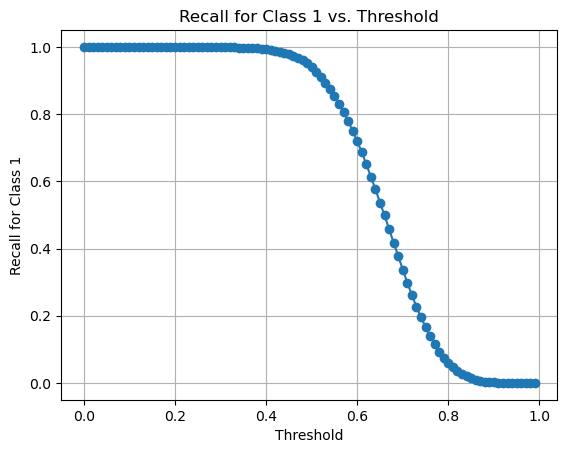

Accuracy: 0.6441644908616188
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.06      0.10     27822
           1       0.65      0.98      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.63      0.52      0.44     76600
weighted avg       0.63      0.64      0.53     76600



In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
import matplotlib.pyplot as plt
'''
# Sample dataframe
data = {
    'latitude': [34.05, 36.16, 40.71, 34.05, 36.16, 40.71],
    'longitude': [-118.24, -115.15, -74.00, -118.24, -115.15, -74.00],
    'temperature': [20, 25, 30, 22, 26, 28],
    'precipitation': [100, 50, 30, 110, 60, 40],
    'date': pd.date_range(start='1/1/2020', periods=6, freq='M'),
    'drought_flag': [0, 1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

# Feature selection
X = df[['latitude', 'longitude', 'temperature', 'precipitation']]
y = df['drought_flag']
'''
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict_proba(X_test)

# Grid search on threshold
thresholds = np.arange(0.0, 1.0, 0.01)
recalls = []

for threshold in thresholds:
    y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
    recall = recall_score(y_test, y_class_pred)
    recalls.append(recall)

# Plotting the recall for class 1 according to the threshold
plt.plot(thresholds, recalls, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Recall for Class 1')
plt.title('Recall for Class 1 vs. Threshold')
plt.grid(True)
plt.show()

# Evaluating the model at a specific threshold (e.g., 0.45)
threshold = 0.45
y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))


In [74]:
threshold = 0.41
y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))

Accuracy: 0.6401958224543081
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.03      0.05     27822
           1       0.64      0.99      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.63      0.51      0.41     76600
weighted avg       0.63      0.64      0.51     76600



In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Load your data
data = pd.read_csv('your_data.csv')

# Calculate annual sums/averages
data['annual_precipitation'] = data.groupby('year')['monthly_precipitation'].transform('sum')
data['annual_temperature'] = data.groupby('year')['monthly_temperature'].transform('mean')
data['annual_precipitation_delta'] = data.groupby('year')['precipitation_delta'].transform('sum')
data['annual_temperature_delta'] = data.groupby('year')['temperature_delta'].transform('mean')

In [ ]:
#X = df[[ 'latitude_1', 'longitude_1', 't2m_delta_1', 'tp_delta_1','swvl1_delta_1','swvl2_delta_1']]

In [76]:
df['t2m_delta_1_yearly_sum'] = df.groupby(['year_2','Code Commune_2'])['t2m_delta_1'].transform('sum')

In [77]:
df['t2m_delta_1_yearly_mean'] = df.groupby(['year_2','Code Commune_2'])['t2m_delta_1'].transform('mean')

In [78]:
df['tp_delta_1_yearly_sum'] = df.groupby(['year_2','Code Commune_2'])['tp_delta_1'].transform('sum')

In [81]:
df['tp_delta_1_yearly_mean'] = df.groupby(['year_2','Code Commune_2'])['tp_delta_1'].transform('mean')

In [ ]:
X = df[[ ''Code Commune_2'', 't2m_delta_1_yearly_sum', 't2m_delta_1_yearly_mean', 'tp_delta_1_yearly_sum', 'tp_delta_1_yearly_mean']]

how to build an annually indice, from monthly precipitations and temperature to predict drought (python dataframe)
I have also temperature_delta and precipitation_delta, a measure of monthly delta (in comparaison to a monthly mean of a reference period)
my y is a flag that says for each commune if it had drought that year.
Use logistic regression to make the prediction
I have also the longitude and latitude of the stations that took the measure and the name of the commune that it belongs to

why do you apply zscore and what does it do ?
what preprocessing do you apply for longitude, latitude

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your data
data = pd.read_csv('your_data.csv')

# Calculate annual sums/averages
data['annual_precipitation'] = data.groupby('year')['monthly_precipitation'].transform('sum')
data['annual_temperature'] = data.groupby('year')['monthly_temperature'].transform('mean')
data['annual_precipitation_delta'] = data.groupby('year')['precipitation_delta'].transform('sum')
data['annual_temperature_delta'] = data.groupby('year')['temperature_delta'].transform('mean')

# Drop duplicates to keep annual data
data = data.drop_duplicates(subset=['year', 'commune_name'])

# Features and target
features = data[['annual_precipitation', 'annual_temperature', 'annual_precipitation_delta', 'annual_temperature_delta', 'longitude', 'latitude']]
target = data['drought']  # Assuming you have a binary target column 'drought'

# Z-score normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
